In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ALL.chr20.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf

grep -v "^##" ALL.chrxx.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf > allChrxx.GRCH38.sorted.vcf

In [39]:
def writeNewtxt(file_path, df):
    """Writes a pandas dataframe into txt, columns separated by tabs ("\t")
    """
    f = open(file_path, 'w')
    str_cols = ""
    for col in df.columns[:-1]:
        str_cols += col + "\t"
    str_cols += df.columns.values[-1]+ "\n"
    f.write(str(str_cols))
    for row in df.values:
        str_row = ""
        for col in row[:-1]:
            str_row += str(col) + "\t"
        str_row += str(row[-1])+ "\n"
        f.write(str_row)
    f.close

In [3]:
gvs_chr20_read= "/home/androx/Documents/trabalho/datasets/Genomic_variants/allChr20.GRCH38.sorted.vcf"
gvs_chr20_df = pd.read_csv(gvs_chr20_read, sep="\t", usecols=['#CHROM',  'POS', 'REF', 'ALT', 'INFO'])

gvs_chr20_df

,#CHROM,POS,REF,ALT,INFO
0,20,60114,T,C,AC=1;AN=5096;DP=67920;AF=0;EAS_AF=0;EUR_AF=0;A...
1,20,60138,T,A,AC=1;AN=5096;DP=69096;AF=0;EAS_AF=0;EUR_AF=0;A...
2,20,60149,C,T,AC=3;AN=5096;DP=66846;AF=0;EAS_AF=0;EUR_AF=0;A...
3,20,60424,A,C,AC=0;AN=5096;DP=29861;AF=0;EAS_AF=0;EUR_AF=0;A...
4,20,60440,A,T,AC=2;AN=5096;DP=26998;AF=0;EAS_AF=0;EUR_AF=0;A...
...,...,...,...,...,...
1817487,20,64333367,G,A,AC=6;AN=5096;DP=16236;AF=0;EAS_AF=0;EUR_AF=0;A...
1817488,20,64333468,C,T,AC=1;AN=5096;DP=13363;AF=0;EAS_AF=0;EUR_AF=0;A...
1817489,20,64333615,G,A,AC=16;AN=5096;DP=13225;AF=0;EAS_AF=0;EUR_AF=0;...
1817490,20,64333621,G,A,AC=10;AN=5096;DP=13129;AF=0;EAS_AF=0;EUR_AF=0;...


In [4]:
writeNewvcf(gvs_chr20_read, gvs_chr20_df)

In [5]:
#gvs_chr20_df["INFO"][0]
gvs_chr20_df["INFO"][30]

'AC=16;AN=5096;DP=78644;AF=0;EAS_AF=0;EUR_AF=0;AFR_AF=0.01;AMR_AF=0;SAS_AF=0;VT=SNP;NS=2548'

In [6]:
#snps_chr20_df2 = gvs_chr20_df.loc["VT=SNP" in gvs_chr20_df['INFO']]
#snps_chr20_df2

def get_df_snp(df):
    snps = []
    for row in df.index:
        snp_array = []
        infos = df["INFO"][row].split(";")
        #if "VT=SNP" in df["INFO"][row]:
        if infos[-2] == "VT=SNP":
            for col in df.columns:
                snp_array.append(df[col][row])
            snps.append(snp_array)
    return pd.DataFrame(snps, columns=df.columns)

def get_df_indels(df):
    indels = []
    for row in df.index:
        indel_array = []
        infos = df["INFO"][row].split(";")
        #if "VT=SNP" not in df["INFO"][row]:
        if infos[-2] != "VT=SNP":
            for col in df.columns:
                indel_array.append(df[col][row])
            indels.append(indel_array)
    return pd.DataFrame(indels, columns=df.columns)

In [7]:
snps_chr20_df = get_df_snp(gvs_chr20_df)
snps_chr20_df

,#CHROM,POS,REF,ALT,INFO
0,20,60114,T,C,AC=1;AN=5096;DP=67920;AF=0;EAS_AF=0;EUR_AF=0;A...
1,20,60138,T,A,AC=1;AN=5096;DP=69096;AF=0;EAS_AF=0;EUR_AF=0;A...
2,20,60149,C,T,AC=3;AN=5096;DP=66846;AF=0;EAS_AF=0;EUR_AF=0;A...
3,20,60424,A,C,AC=0;AN=5096;DP=29861;AF=0;EAS_AF=0;EUR_AF=0;A...
4,20,60440,A,T,AC=2;AN=5096;DP=26998;AF=0;EAS_AF=0;EUR_AF=0;A...
...,...,...,...,...,...
1706437,20,64333367,G,A,AC=6;AN=5096;DP=16236;AF=0;EAS_AF=0;EUR_AF=0;A...
1706438,20,64333468,C,T,AC=1;AN=5096;DP=13363;AF=0;EAS_AF=0;EUR_AF=0;A...
1706439,20,64333615,G,A,AC=16;AN=5096;DP=13225;AF=0;EAS_AF=0;EUR_AF=0;...
1706440,20,64333621,G,A,AC=10;AN=5096;DP=13129;AF=0;EAS_AF=0;EUR_AF=0;...


In [8]:
indels_chr20_df = get_df_indels(gvs_chr20_df)
indels_chr20_df

,#CHROM,POS,REF,ALT,INFO
0,20,61822,TC,T,AC=2275;AN=5096;DP=90626;AF=0.45;EAS_AF=0.43;E...
1,20,61910,CTCCAT,C,AC=866;AN=5096;DP=166567;AF=0.17;EAS_AF=0.12;E...
2,20,62000,TTCCCC,T,AC=2513;AN=5096;DP=77552;AF=0.49;EAS_AF=0.5;EU...
3,20,62581,TCCAC,T,AC=2533;AN=5096;DP=63635;AF=0.5;EAS_AF=0.5;EUR...
4,20,62585,C,CT,AC=2533;AN=5096;DP=61136;AF=0.5;EAS_AF=0.5;EUR...
...,...,...,...,...,...
111045,20,64303038,ATAAT,A,AC=2;AN=5096;DP=6777;AF=0;EAS_AF=0;EUR_AF=0;AF...
111046,20,64303063,TTA,T,AC=38;AN=5096;DP=6878;AF=0.01;EAS_AF=0.03;EUR_...
111047,20,64316425,CGCACCCA,C,AC=4031;AN=5096;DP=8964;AF=0.79;EAS_AF=0.99;EU...
111048,20,64319647,AT,A,AC=8;AN=5096;DP=23027;AF=0;EAS_AF=0;EUR_AF=0;A...


In [9]:
def calc_snpDensity(cytobands_df, gv_df_chr, chrom = "chr20"):
    """calculates the density of snps within the cytobands of one chromosome
    """
    densities = []
    chr_cytobands = cytobands_df.loc[cytobands_df['Chromossome'] == chrom]
    chr_size = chr_cytobands["Last_index"][chr_cytobands.index[-1]]+1
    chr_gvs = np.zeros((chr_size), dtype=int)
    #percorrer o dataset pelas vulnerabilidades no cromossoma e anotar na lista np.zeroes
    for row in gv_df_chr.index:
        chr_gvs[gv_df_chr["POS"][row]]+=1
    #Calculo da densidade para cada cytoband
    for cytoband in chr_cytobands.index:
        cytoband_array = chr_gvs[int(chr_cytobands["First_index"][cytoband]):int(chr_cytobands["Last_index"][cytoband])+1]
        snp_indel_length = np.count_nonzero(cytoband_array)
        cytoband_length = chr_cytobands["Size"][cytoband]
        density = snp_indel_length/cytoband_length
        densities.append(round(density, 3))
        
    chr_cytobands.insert(len(chr_cytobands.columns), "SNP_density", densities, True)
    return chr_cytobands

In [27]:
def calc_indelDens(cytobands_df, gv_df_chr, chrom = "chr20"):
    """calculates the density of indels, inserts or deletes within the cytobands of one chromosome
    """
    densities = []
    chr_cytobands = cytobands_df.loc[cytobands_df['Chromossome'] == chrom]
    chr_size = chr_cytobands["Last_index"][chr_cytobands.index[-1]]+1
    chr_gvs = np.zeros((chr_size), dtype=int)
    #percorrer o dataset pelas vulnerabilidades no cromossoma e anotar na lista np.zeroes
    for row in gv_df_chr.index:
        if len(gv_df_chr["REF"][row]) > len(gv_df_chr["ALT"][row]):               #Deletion
            chr_gvs[gv_df_chr["POS"][row]:gv_df_chr["POS"][row] + len(gv_df_chr["REF"][row])+1]+=1
        else:                                                                    #Insertion
            chr_gvs[gv_df_chr["POS"][row]:gv_df_chr["POS"][row] + len(gv_df_chr["ALT"][row])+1]+=1
    #Calculo da densidade para cada cytoband
    for cytoband in chr_cytobands.index:
        cytoband_array = chr_gvs[int(chr_cytobands["First_index"][cytoband]):int(chr_cytobands["Last_index"][cytoband])+1]
        snp_indel_length = np.count_nonzero(cytoband_array)
        cytoband_length = chr_cytobands["Size"][cytoband]
        density = snp_indel_length/cytoband_length
        densities.append(round(density, 3))
        
    chr_cytobands.insert(len(chr_cytobands.columns), "Indel_density", densities, True)
    return chr_cytobands

In [11]:
def calc_insert_deleteDens(cytobands_df, gv_df_chr, chrom = "chr20", dens_type = "Insertion_density"):
    """calculates the density of inserts or deletes within the cytobands of one chromosome
    """
    densities = []
    chr_cytobands = cytobands_df.loc[cytobands_df['Chromossome'] == chrom]
    chr_size = chr_cytobands["Last_index"][chr_cytobands.index[-1]]+1
    chr_gvs = np.zeros((chr_size), dtype=int)
    #percorrer o dataset pelas vulnerabilidades no cromossoma e anotar na lista np.zeroes
    for row in gv_df_chr.index:
        if dens_type == "Insertion_density":
            chr_gvs[gv_df_chr["POS"][row]:gv_df_chr["POS"][row] + len(gv_df_chr["ALT"][row])+1]+=1
        elif dens_type == "Deletion_density":
            chr_gvs[gv_df_chr["POS"][row]:gv_df_chr["POS"][row] + len(gv_df_chr["REF"][row])+1]+=1
    #Calculo da densidade para cada cytoband
    for cytoband in chr_cytobands.index:
        cytoband_array = chr_gvs[int(chr_cytobands["First_index"][cytoband]):int(chr_cytobands["Last_index"][cytoband])+1]
        snp_indel_length = np.count_nonzero(cytoband_array)
        cytoband_length = chr_cytobands["Size"][cytoband]
        density = snp_indel_length/cytoband_length
        densities.append(round(density, 3))
        
    chr_cytobands.insert(len(chr_cytobands.columns), dens_type, densities, True)
    return chr_cytobands

In [28]:
cytoPath_read = "/home/androx/Documents/trabalho/citobands/cytobandFiltered_processed_str_dr_dg.txt"
cytoPath_write = "/home/androx/Documents/trabalho/citobands/cytobandFiltered_processed_str_dr_dg_gv.txt"

cytobands_df = pd.read_csv(cytoPath_read, sep="\t")#, header=None))

cytobands_df

,Chromossome,First_index,Last_index,Citoband,Unkown,Size,STR_Density,DR_density,CDSs_density,CDSIntron_density,CDSExon_density,5P_UTR_density,UTR5Intron_density,UTR5Exon_density,3P_UTR_density,UTR3Intron_density,UTR3Exon_density,Exons_density,Introns_density
0,chr1,0,2299999,p36.33,gneg,2299999,0.088,0.326,0.038,0.022,0.015,0.033,0.022,0.021,0.012,0.025,0.019,0.171,0.069
1,chr1,2300000,5299999,p36.32,gpos25,2999999,0.084,0.282,0.016,0.011,0.005,0.022,0.010,0.014,0.004,0.013,0.006,0.079,0.034
2,chr1,5300000,7099999,p36.31,gneg,1799999,0.056,0.275,0.024,0.010,0.008,0.034,0.009,0.020,0.006,0.012,0.010,0.082,0.031
3,chr1,7100000,9099999,p36.23,gpos25,1999999,0.049,0.405,0.013,0.004,0.002,0.018,0.003,0.010,0.005,0.004,0.004,0.047,0.011
4,chr1,9100000,12499999,p36.22,gneg,3399999,0.056,0.404,0.030,0.010,0.008,0.036,0.010,0.019,0.005,0.014,0.010,0.093,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,chrY,12400000,17099999,q11.221,gpos50,4699999,0.037,0.015,0.004,0.001,0.001,0.003,0.001,0.003,0.001,0.001,0.003,0.016,0.003
859,chrY,17100000,19599999,q11.222,gneg,2499999,0.062,0.013,0.002,0.004,0.004,0.001,0.004,0.003,0.000,0.004,0.002,0.045,0.012
860,chrY,19600000,23799999,q11.223,gpos50,4199999,0.082,0.006,0.005,0.004,0.002,0.004,0.004,0.002,0.001,0.005,0.002,0.036,0.013
861,chrY,23800000,26599999,q11.23,gneg,2799999,0.026,0.002,0.003,0.002,0.000,0.002,0.003,0.001,0.001,0.003,0.001,0.034,0.008


In [29]:
chr20_df = calc_snpDensity(cytobands_df, snps_chr20_df, "chr20")
chr20_df

,Chromossome,First_index,Last_index,Citoband,Unkown,Size,STR_Density,DR_density,CDSs_density,CDSIntron_density,CDSExon_density,5P_UTR_density,UTR5Intron_density,UTR5Exon_density,3P_UTR_density,UTR3Intron_density,UTR3Exon_density,Exons_density,Introns_density,SNP_density
432,chr20,0,5099999,p13,gneg,5099999,0.032,0.308,0.021,0.012,0.009,0.034,0.010,0.016,0.006,0.016,0.010,0.085,0.038,0.028
433,chr20,5100000,9199999,p12.3,gpos75,4099999,0.019,0.196,0.006,0.003,0.004,0.013,0.002,0.007,0.003,0.003,0.006,0.035,0.008,0.027
434,chr20,9200000,11999999,p12.2,gneg,2799999,0.017,0.226,0.007,0.007,0.004,0.012,0.005,0.008,0.002,0.007,0.006,0.048,0.019,0.027
435,chr20,12000000,17899999,p12.1,gpos75,5899999,0.018,0.149,0.005,0.003,0.002,0.005,0.003,0.003,0.001,0.004,0.002,0.021,0.010,0.027
436,chr20,17900000,21299999,p11.23,gneg,3399999,0.023,0.236,0.011,0.006,0.004,0.013,0.005,0.007,0.004,0.007,0.006,0.045,0.018,0.027
437,chr20,21300000,22299999,p11.22,gpos25,999999,0.018,0.072,0.007,0.005,0.006,0.006,0.005,0.006,0.001,0.006,0.003,0.043,0.016,0.027
438,chr20,22300000,25699999,p11.21,gneg,3399999,0.030,0.283,0.010,0.007,0.007,0.014,0.007,0.012,0.003,0.008,0.007,0.060,0.022,0.031
439,chr20,25700000,28099999,p11.1,acen,2399999,0.756,0.022,0.000,0.002,0.000,0.000,0.002,0.000,0.000,0.002,0.000,0.015,0.006,0.006
440,chr20,28100000,30399999,q11.1,acen,2299999,0.561,0.015,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.013,0.003,0.014
441,chr20,30400000,33499999,q11.21,gneg,3099999,0.120,0.278,0.019,0.006,0.010,0.022,0.008,0.012,0.005,0.010,0.007,0.063,0.024,0.024


In [30]:
chr20_df = calc_indelDens(chr20_df, indels_chr20_df, "chr20")
chr20_df

,Chromossome,First_index,Last_index,Citoband,Unkown,Size,STR_Density,DR_density,CDSs_density,CDSIntron_density,...,5P_UTR_density,UTR5Intron_density,UTR5Exon_density,3P_UTR_density,UTR3Intron_density,UTR3Exon_density,Exons_density,Introns_density,SNP_density,Indel_density
432,chr20,0,5099999,p13,gneg,5099999,0.032,0.308,0.021,0.012,...,0.034,0.010,0.016,0.006,0.016,0.010,0.085,0.038,0.028,0.009
433,chr20,5100000,9199999,p12.3,gpos75,4099999,0.019,0.196,0.006,0.003,...,0.013,0.002,0.007,0.003,0.003,0.006,0.035,0.008,0.027,0.009
434,chr20,9200000,11999999,p12.2,gneg,2799999,0.017,0.226,0.007,0.007,...,0.012,0.005,0.008,0.002,0.007,0.006,0.048,0.019,0.027,0.008
435,chr20,12000000,17899999,p12.1,gpos75,5899999,0.018,0.149,0.005,0.003,...,0.005,0.003,0.003,0.001,0.004,0.002,0.021,0.010,0.027,0.009
436,chr20,17900000,21299999,p11.23,gneg,3399999,0.023,0.236,0.011,0.006,...,0.013,0.005,0.007,0.004,0.007,0.006,0.045,0.018,0.027,0.008
437,chr20,21300000,22299999,p11.22,gpos25,999999,0.018,0.072,0.007,0.005,...,0.006,0.005,0.006,0.001,0.006,0.003,0.043,0.016,0.027,0.007
438,chr20,22300000,25699999,p11.21,gneg,3399999,0.030,0.283,0.010,0.007,...,0.014,0.007,0.012,0.003,0.008,0.007,0.060,0.022,0.031,0.008
439,chr20,25700000,28099999,p11.1,acen,2399999,0.756,0.022,0.000,0.002,...,0.000,0.002,0.000,0.000,0.002,0.000,0.015,0.006,0.006,0.001
440,chr20,28100000,30399999,q11.1,acen,2299999,0.561,0.015,0.000,0.001,...,0.000,0.001,0.000,0.000,0.001,0.000,0.013,0.003,0.014,0.002
441,chr20,30400000,33499999,q11.21,gneg,3099999,0.120,0.278,0.019,0.006,...,0.022,0.008,0.012,0.005,0.010,0.007,0.063,0.024,0.024,0.007


In [31]:
def plot_1chr(chr_df, chromossome, col = "SNP_density"):
    plt.figure(figsize=(30,10))
    plt.plot(chr_df["Citoband"], chr_df[col], 'ro--', linewidth=2, markersize=6)
    plt.xlabel("Cytoband")
    plt.ylabel(col)
    plt.grid()
    plt.title(col + " in chromosome "  + chromossome)
    #plt.show()
    plt.savefig(chromossome + col)

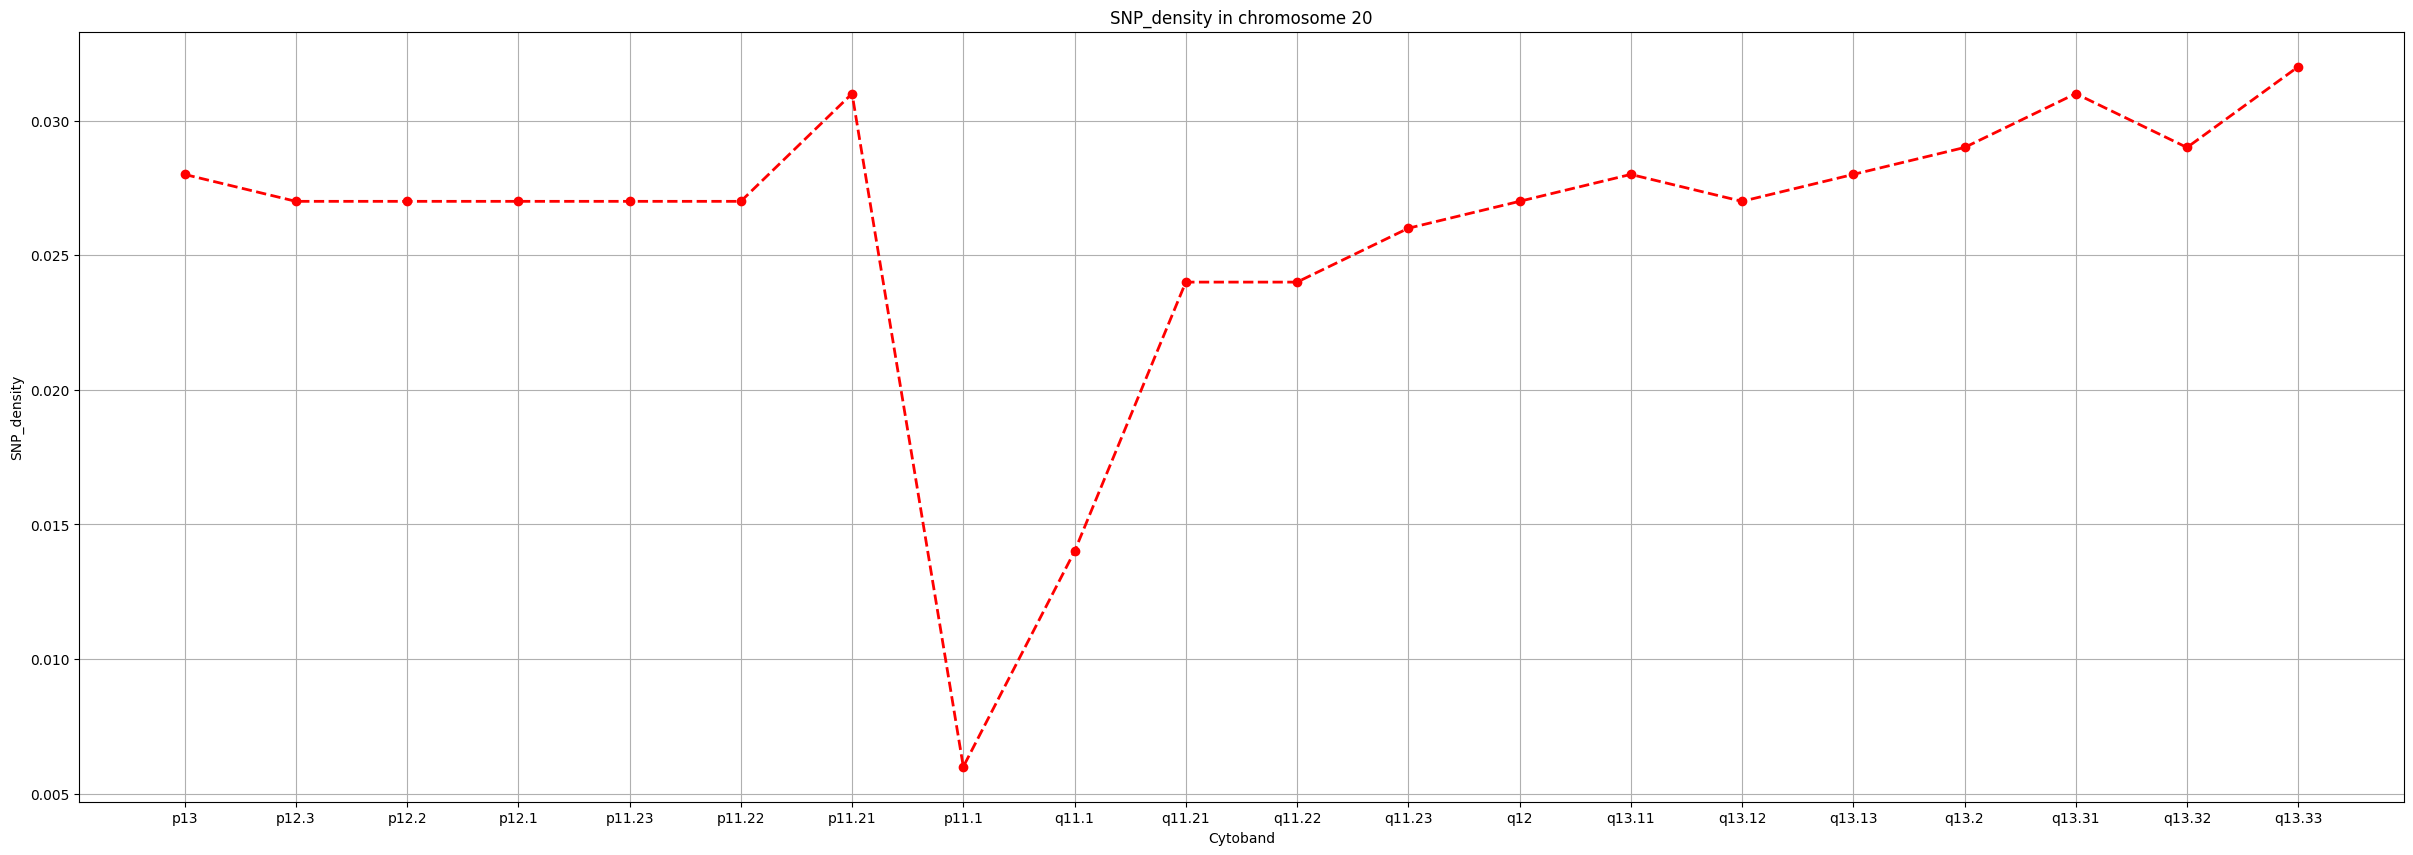

In [16]:
plot_1chr(chr20_df, "20", "SNP_density")

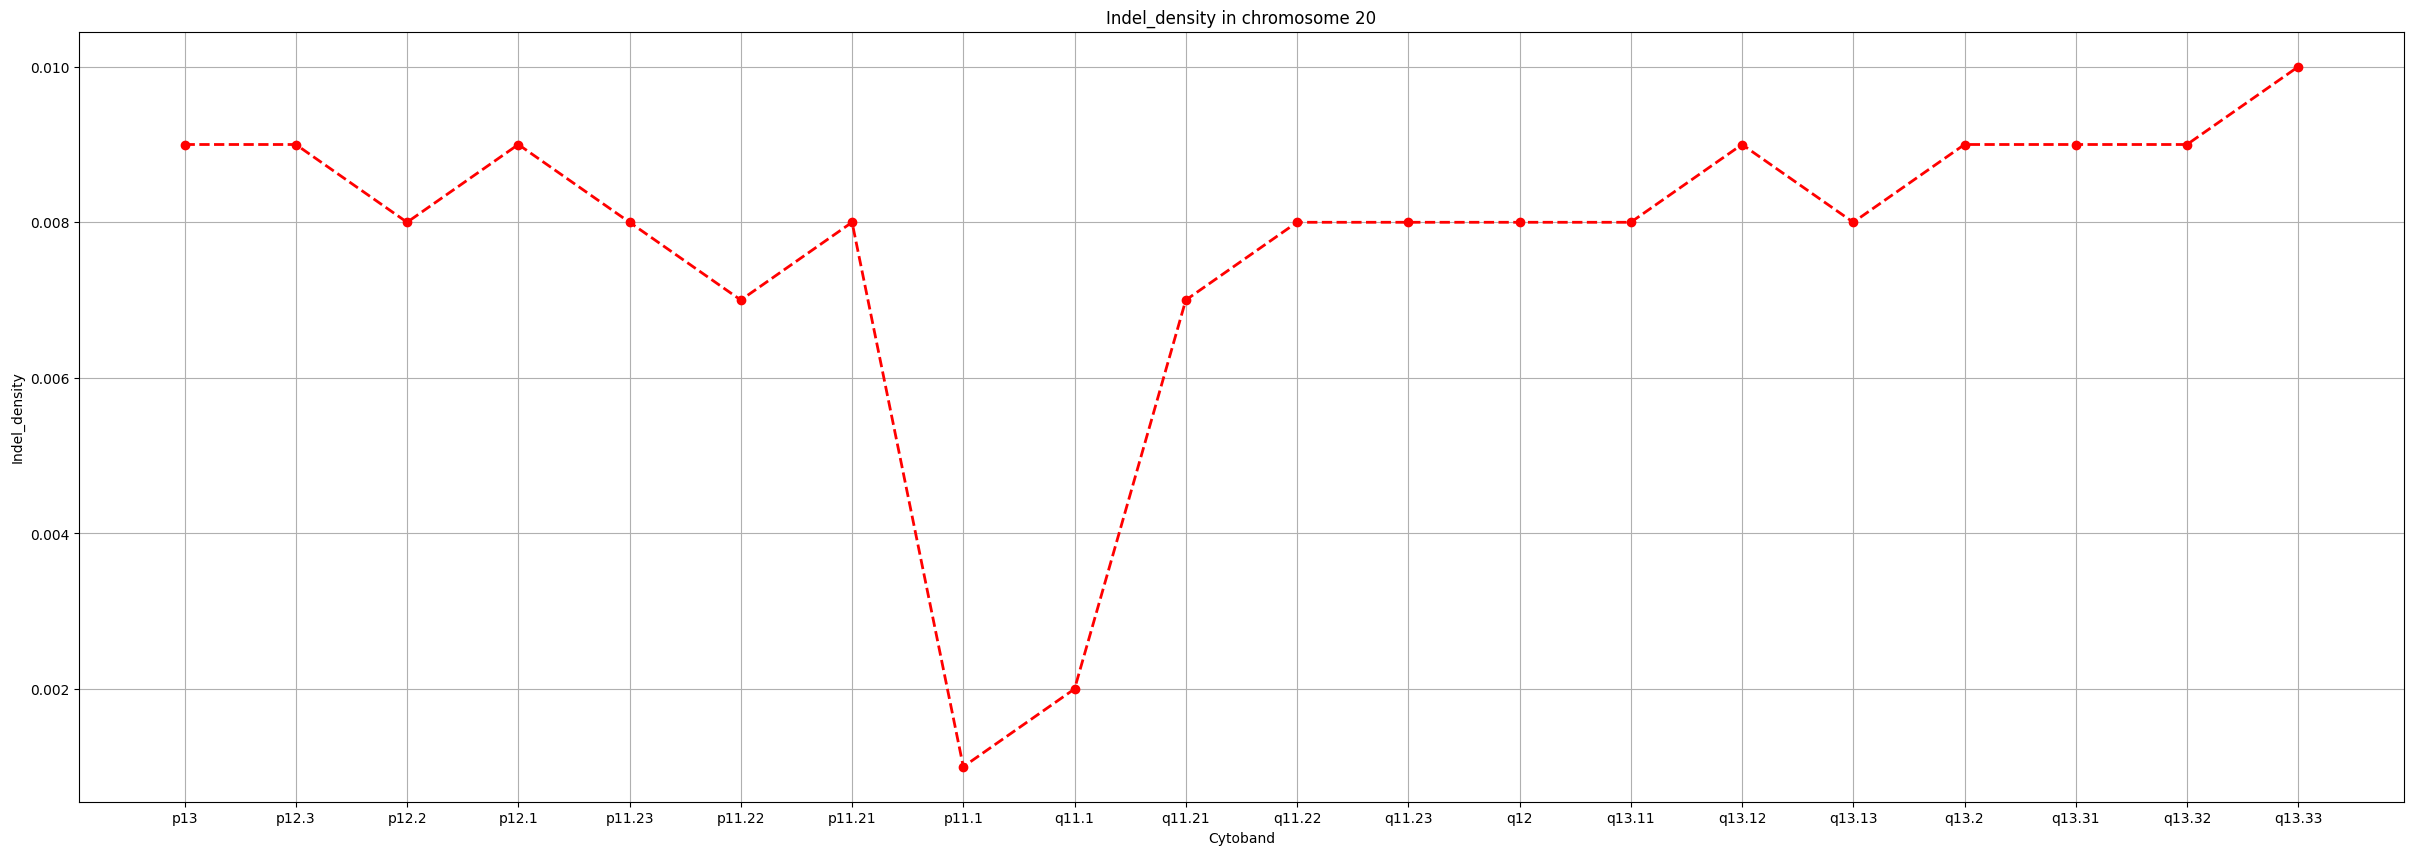

In [32]:
plot_1chr(chr20_df, "20", "Indel_density")

## Seperated density values for insertions and deletions

In [33]:
inserts_chr20 = indels_chr20_df.loc[(indels_chr20_df['REF']) < (indels_chr20_df['ALT'])]
inserts_chr20

,#CHROM,POS,REF,ALT,INFO
4,20,62585,C,CT,AC=2533;AN=5096;DP=61136;AF=0.5;EAS_AF=0.5;EUR...
5,20,62594,C,CTCCAT,AC=2532;AN=5096;DP=63087;AF=0.5;EAS_AF=0.5;EUR...
6,20,62597,C,CATTCT,AC=2532;AN=5096;DP=64749;AF=0.5;EAS_AF=0.5;EUR...
7,20,63045,T,TCCATC,AC=2531;AN=5096;DP=54944;AF=0.5;EAS_AF=0.5;EUR...
10,20,67373,G,GAAATGTGAT,AC=154;AN=5096;DP=27421;AF=0.03;EAS_AF=0;EUR_A...
...,...,...,...,...,...
111030,20,64279887,C,CTTT,AC=4977;AN=5096;DP=19628;AF=0.98;EAS_AF=1;EUR_...
111034,20,64280260,C,CA,AC=3;AN=5096;DP=23350;AF=0;EAS_AF=0;EUR_AF=0;A...
111036,20,64281951,G,GTTGT,AC=2;AN=5096;DP=20777;AF=0;EAS_AF=0;EUR_AF=0;A...
111041,20,64284031,A,AT,AC=3;AN=5096;DP=20792;AF=0;EAS_AF=0;EUR_AF=0;A...


In [34]:
deletions_chr20 = indels_chr20_df.loc[(indels_chr20_df['REF']) > (indels_chr20_df['ALT'])]
deletions_chr20

,#CHROM,POS,REF,ALT,INFO
0,20,61822,TC,T,AC=2275;AN=5096;DP=90626;AF=0.45;EAS_AF=0.43;E...
1,20,61910,CTCCAT,C,AC=866;AN=5096;DP=166567;AF=0.17;EAS_AF=0.12;E...
2,20,62000,TTCCCC,T,AC=2513;AN=5096;DP=77552;AF=0.49;EAS_AF=0.5;EU...
3,20,62581,TCCAC,T,AC=2533;AN=5096;DP=63635;AF=0.5;EAS_AF=0.5;EUR...
8,20,65303,TTCCAC,T,AC=11;AN=5096;DP=30505;AF=0;EAS_AF=0;EUR_AF=0;...
...,...,...,...,...,...
111044,20,64287543,TA,T,AC=10;AN=5096;DP=22657;AF=0;EAS_AF=0.01;EUR_AF...
111045,20,64303038,ATAAT,A,AC=2;AN=5096;DP=6777;AF=0;EAS_AF=0;EUR_AF=0;AF...
111046,20,64303063,TTA,T,AC=38;AN=5096;DP=6878;AF=0.01;EAS_AF=0.03;EUR_...
111047,20,64316425,CGCACCCA,C,AC=4031;AN=5096;DP=8964;AF=0.79;EAS_AF=0.99;EU...


In [35]:
chr20_df = calc_insert_deleteDens(chr20_df, inserts_chr20, "chr20", "Insertion_density")

In [36]:
chr20_df = calc_insert_deleteDens(chr20_df, deletions_chr20, "chr20", "Deletion_density")

In [37]:
chr20_df

,Chromossome,First_index,Last_index,Citoband,Unkown,Size,STR_Density,DR_density,CDSs_density,CDSIntron_density,...,UTR5Exon_density,3P_UTR_density,UTR3Intron_density,UTR3Exon_density,Exons_density,Introns_density,SNP_density,Indel_density,Insertion_density,Deletion_density
432,chr20,0,5099999,p13,gneg,5099999,0.032,0.308,0.021,0.012,...,0.016,0.006,0.016,0.010,0.085,0.038,0.028,0.009,0.002,0.006
433,chr20,5100000,9199999,p12.3,gpos75,4099999,0.019,0.196,0.006,0.003,...,0.007,0.003,0.003,0.006,0.035,0.008,0.027,0.009,0.002,0.006
434,chr20,9200000,11999999,p12.2,gneg,2799999,0.017,0.226,0.007,0.007,...,0.008,0.002,0.007,0.006,0.048,0.019,0.027,0.008,0.002,0.006
435,chr20,12000000,17899999,p12.1,gpos75,5899999,0.018,0.149,0.005,0.003,...,0.003,0.001,0.004,0.002,0.021,0.010,0.027,0.009,0.002,0.006
436,chr20,17900000,21299999,p11.23,gneg,3399999,0.023,0.236,0.011,0.006,...,0.007,0.004,0.007,0.006,0.045,0.018,0.027,0.008,0.002,0.006
437,chr20,21300000,22299999,p11.22,gpos25,999999,0.018,0.072,0.007,0.005,...,0.006,0.001,0.006,0.003,0.043,0.016,0.027,0.007,0.002,0.005
438,chr20,22300000,25699999,p11.21,gneg,3399999,0.030,0.283,0.010,0.007,...,0.012,0.003,0.008,0.007,0.060,0.022,0.031,0.008,0.002,0.006
439,chr20,25700000,28099999,p11.1,acen,2399999,0.756,0.022,0.000,0.002,...,0.000,0.000,0.002,0.000,0.015,0.006,0.006,0.001,0.000,0.001
440,chr20,28100000,30399999,q11.1,acen,2299999,0.561,0.015,0.000,0.001,...,0.000,0.000,0.001,0.000,0.013,0.003,0.014,0.002,0.001,0.002
441,chr20,30400000,33499999,q11.21,gneg,3099999,0.120,0.278,0.019,0.006,...,0.012,0.005,0.010,0.007,0.063,0.024,0.024,0.007,0.002,0.006


In [40]:
cytoPath_write = "/home/androx/Documents/trabalho/citobands/Latest_gvs/cytobandFiltered_processed_str_dr_dg_gv_chr20.txt"
writeNewtxt(cytoPath_write, chr20_df)